In [1]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.aesthetics_class import Aesthetics
from evaluation_scripts.time_series_class import TimeSeries

In [2]:
models = {"val_sim.pkl":"val", "var_sim.pkl":"var"}
var_info = {"linewidth": 3,
          "blockwidth": 20,
           "entry":'variation sim (95% pi)'
          }
val_info = {"linewidth": 3,
           "entry":'validation sim'
          }
var_info = {"linewidth": 3,
          "blockwidth": 20,
           "entry":'variation sim (95% pi)'
          }
exp_info = {"entry":'exp data (mean, min, max)',
       "s":3}

style = Aesthetics(
    style = "white", 
    grid = True, 
    box=False,
    fontsize=30, 
    n = 1,
    legend_scale = 3,
    legend_size = 20)
style.time_series()
style.add_legend(exp_info, "exp") 
style.add_legend(val_info, "val")
style.add_legend(var_info, "var")

dark = Aesthetics(
    style = "black", 
    grid = True, 
    box=False,
    fontsize=30, 
    n = 1,
    legend_scale = 3,
    legend_size = 20)
dark.time_series()
dark.add_legend(exp_info, "exp") 
dark.add_legend(val_info, "val")
dark.add_legend(var_info, "var")



<Figure size 640x480 with 0 Axes>

In [3]:
from figures import Figure, styles
import matplotlib.pyplot as plt
import matplotlib as mpl

# Disable LaTeX rendering globally
mpl.rcParams['text.usetex'] = False


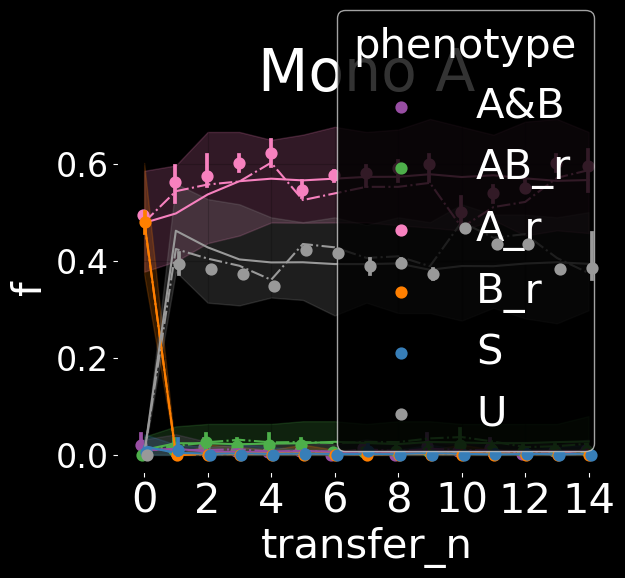

In [4]:
exp3 = Experiment("20220412")
scenario3 = TimeSeries(exp3)
scenario3.load_models(models)

scenario3.plot_strategy("Mono A", style, )
plt.show()

Figure saved at /Users/malte/Documents/Meetings/Smiddy/cycling.pdf


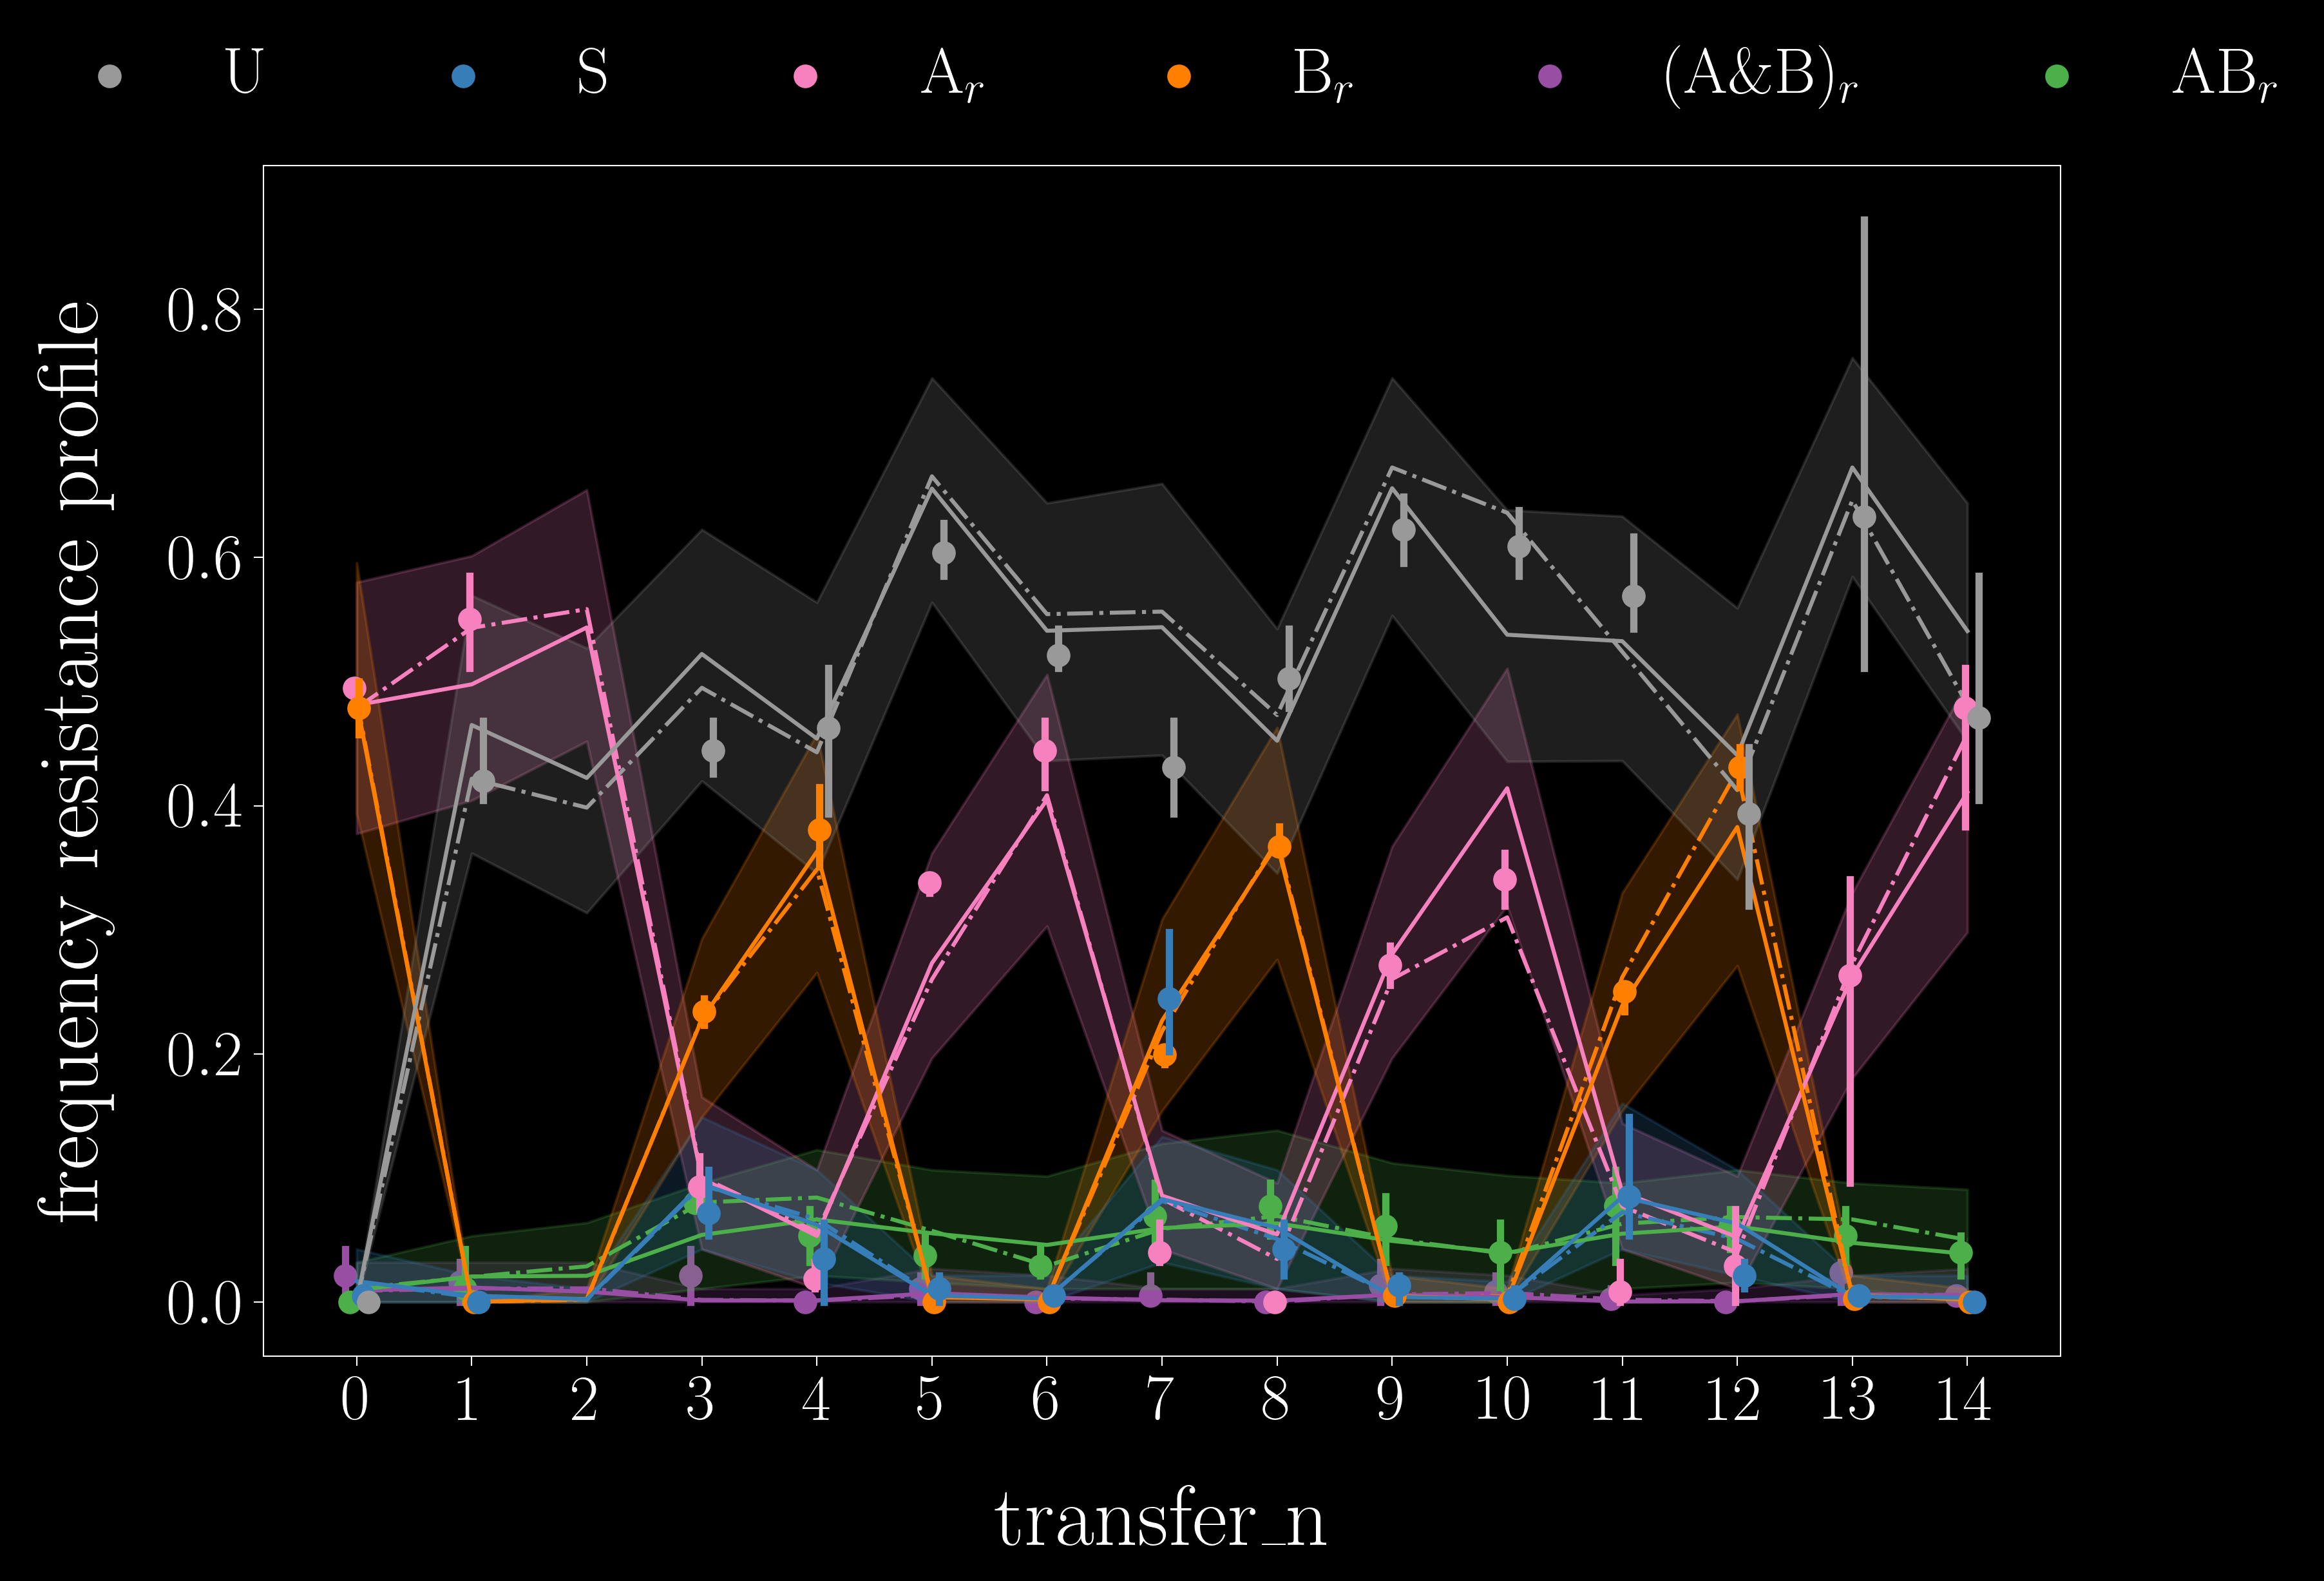

In [5]:
presentation = Figure(styles["presentation"])
presentation.add_folder("/Users/malte/Documents/Meetings/Smiddy")
df = scenario3.summary[(scenario3.summary.phenotype != "Other") & (scenario3.summary.strategy == "Cycling")].copy()
df.phenotype.replace({"A&B":"(A\&B)\_r"})
df.phenotype = df.phenotype.replace({"A&B":"(A\&B)_r"})
df.phenotype = df.phenotype.str.replace("_r", r"$_r$")

keys = ['U', 'S', 'A$_r$', 'B$_r$', '(A\\&B)$_r$', 'AB$_r$']
colors = list(style.phenotype_colors.values())[0:-1]
palette = dict(zip(keys, colors))
palette.update(style.phenotype_colors)

_, ax = presentation.create_figure_with_style()
scenario3.strategy_plotter(df, ax = ax, palette = palette)
scenario3.plot_models("Cycling", ax, palette)
#for model, model_case in zip(scenario3.model_data, scenario3.model_dict.values()):
 #           plot_model(model, strategy, model_case, ax, aes)
#ax.plot([0, 1], [0, 1])

# Modify the legend
handles, labels = ax.get_legend_handles_labels()

# Create a mapping of labels to handles
handle_dict = dict(zip(labels, handles))

# Reorder handles according to the keys list
ordered_handles = [handle_dict[key] for key in keys if key in handle_dict]

# Set the custom legend
ax.legend(
    ordered_handles,  # Reordered handles
    keys,             # Reordered labels
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=6,           # Six columns for the legend
    frameon=False
)
ax.set_ylabel("frequency resistance profile")
presentation.save_figure("cycling")
plt.show()

In [6]:
scenario3.strategy_plotter(df)

In [7]:


scenario3.plot_strategy("Mono A", dark )

In [8]:

presentation.phenotype_colors = style.phenotype_colors
presentation.plot_n_times = 1
presentation.rcparams = presentation.style["rcParams"]
scenario3.plot_strategy("Cycling", presentation, )

In [9]:
scenario3.plot_all(style, sans_poisson = False)
scenario3.save_figure("20220412_timeplot.pdf")

RuntimeError: latex was not able to process the following string:
b'A&B'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpa56shwml 7f6e1b746db1f3d2057dd252f5c6d3b9.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7f6e1b746db1f3d2057dd252f5c6d3b9.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2020/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 7f6e1b746db1f3d2057dd252f5c6d3b9.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Misplaced alignment tab character &.
l.29 {\rmfamily A&
                  B}%
No pages of output.
Transcript written on tmpa56shwml/7f6e1b746db1f3d2057dd252f5c6d3b9.log.




In [ ]:
style2 = Aesthetics(
    style = "white", 
    grid = True, 
    x_tick_space = 4,
    box=False, 
    fontsize=30, 
    n = 1,
    legend_scale = 3,
    legend_size = 20)
style2.time_series()
style2.add_legend(exp_info, "exp")
style2.add_legend(val_info, "val")
style2.add_legend(var_info, "var")

In [ ]:
exp2 = Experiment("20220127")
scenario2 = TimeSeries(exp2)
scenario2.load_models(models)
scenario2.plot_all(style2, sans_poisson = False)
scenario2.save_figure("20220127_timeplot.pdf")

In [ ]:
exp1 = Experiment("20210417")
scenario1 = TimeSeries(exp1)
scenario1.load_models(models)
scenario1.plot_all(style, sans_poisson = False)
scenario1.save_figure("20210417_timeplot.pdf")

In [ ]:
models = {"val_sim_clean.pkl":"val", "var_sim_clean.pkl":"var"}
exp1 = Experiment("20210417")
scenario1 = TimeSeries(exp1)
scenario1.load_models(models)
scenario1.plot_all(style, sans_poisson = False)
scenario1.save_figure("20210417_timeplot_clean.pdf")